In [1]:
## In this project, you are provided a dataset which has the details of the insurance policy along with the customer details.
## It also has the details of the accident on the basis of which the claims have been made.

## Target variable: fraud_reported

## 1. Problem Statement: 

## Need to work with some auto insurance data to demonstrate a predictive model that predicts if an insurance claim is fraudulent or not. 

In [2]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
df= pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
## We can see there are 1000 rows and 40 columns.
df.shape

(1000, 40)

In [5]:
## We can see there is no null value i the above data....
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
##It seems there ismissing values in _c39 column of df. Lets check null value of each columns.
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
## I am droping _c39 column since it has all null value.
df=df.drop("_c39", axis=1)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [8]:
##We cn see Date is object type not data type. We need to work on it.
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

df['Day']=df['policy_bind_date'].apply(lambda x:x.day)

df['month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df=df.drop("policy_bind_date", axis=1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,month,year
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,6510,13020,52080,10.0,1.0,2004,1.0,17,10,2014
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,780,780,3510,8.0,12.0,2007,1.0,27,6,2006
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,7700,3850,23100,4.0,30.0,2007,0.0,9,6,2000
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,6340,6340,50720,3.0,34.0,2014,1.0,25,5,1990
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,1300,650,4550,0.0,31.0,2009,0.0,6,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,...,17440,8720,61040,6.0,6.0,2006,0.0,16,7,1991
996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,...,18080,18080,72320,13.0,28.0,2015,0.0,1,5,2014
997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,...,7500,7500,52500,11.0,19.0,1996,0.0,17,2,2003
998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,5220,5220,36540,1.0,5.0,1998,0.0,18,11,2011


In [10]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("fraud_reported", axis=1)
y=df['fraud_reported']

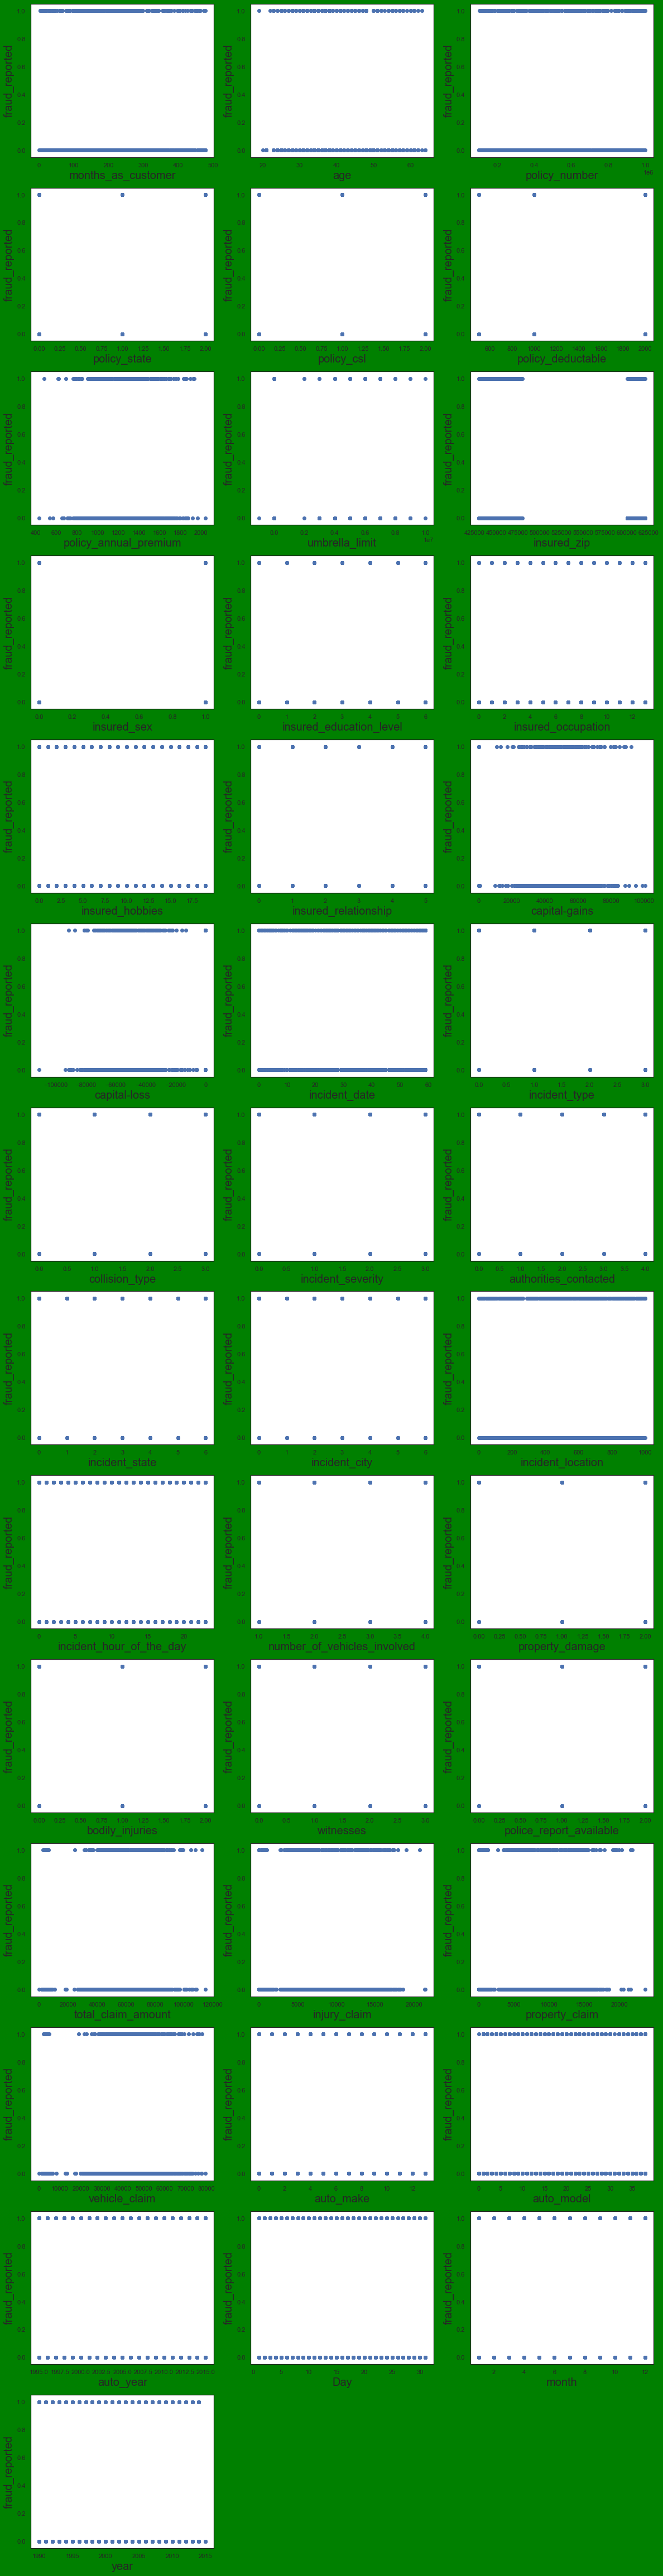

In [11]:
plt.figure(figsize=(20,90),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('fraud_reported',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [12]:
print('Correlation of different features of our dataset with fraud_reported:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['fraud_reported'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with fraud_reported:
months_as_customer : 0.0205
age : 0.0121
policy_number : -0.0294
policy_state : 0.0294
policy_csl : -0.0372
policy_deductable : 0.0148
policy_annual_premium : -0.0145
umbrella_limit : 0.0586
insured_zip : 0.0194
insured_sex : 0.0309
insured_education_level : 0.0088
insured_occupation : 0.0016
insured_hobbies : -0.0468
insured_relationship : 0.0210
capital-gains : -0.0192
capital-loss : -0.0149
incident_date : -0.0477
incident_type : -0.0504
collision_type : 0.1101
incident_severity : -0.4060
authorities_contacted : -0.0458
incident_state : -0.0514
incident_city : -0.0404
incident_location : -0.0088
incident_hour_of_the_day : 0.0043
number_of_vehicles_involved : 0.0518
property_damage : -0.0305
bodily_injuries : 0.0339
witnesses : 0.0495
police_report_available : -0.0282
total_claim_amount : 0.1637
injury_claim : 0.0910
property_claim : 0.1378
vehicle_claim : 0.1700
auto_make : -0.0275
auto_model : 0.0007
auto_year : 

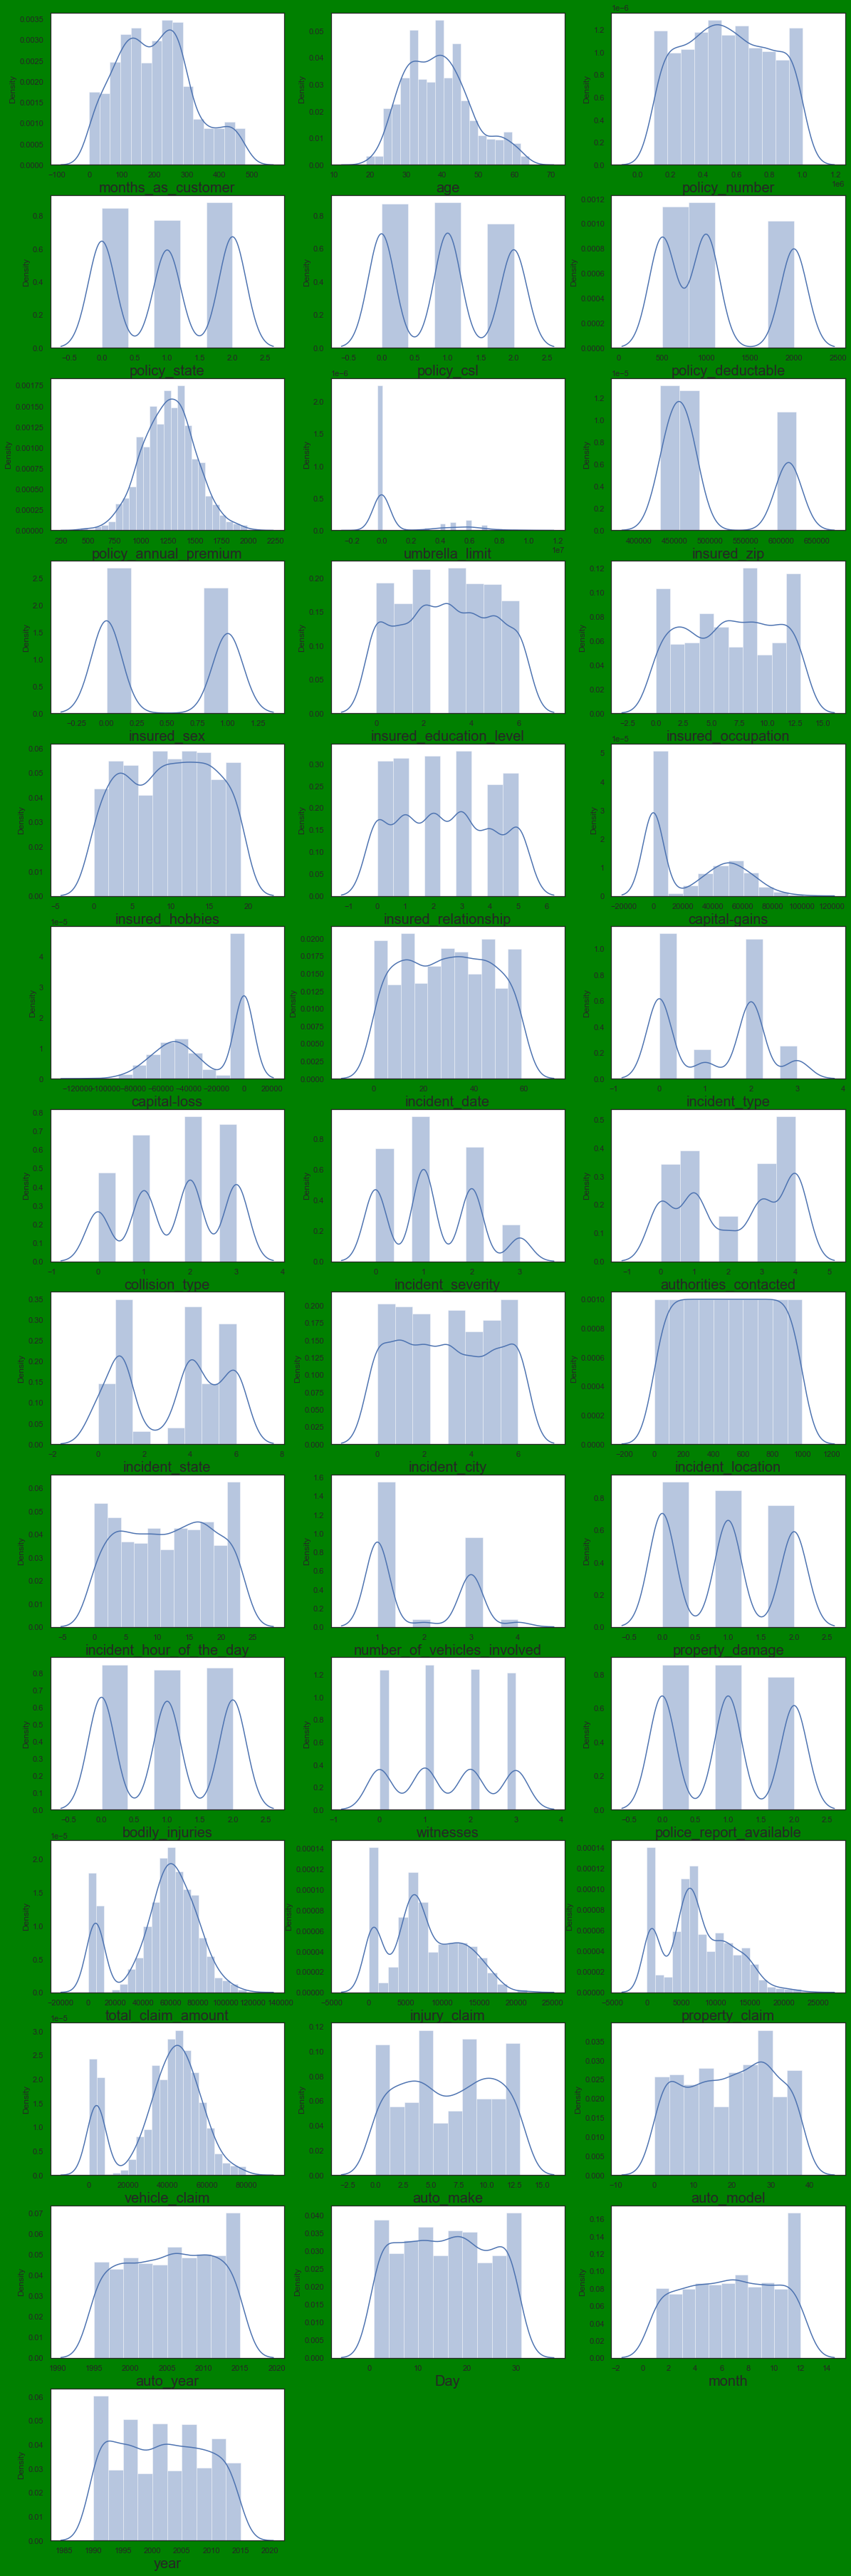

In [13]:
## Lets see how data is distributed.
plt.figure(figsize=(20,70),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=48:
        ax=plt.subplot(15,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [14]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [15]:
df=df.drop("month", axis=1)
df=df.drop("Day", axis=1)

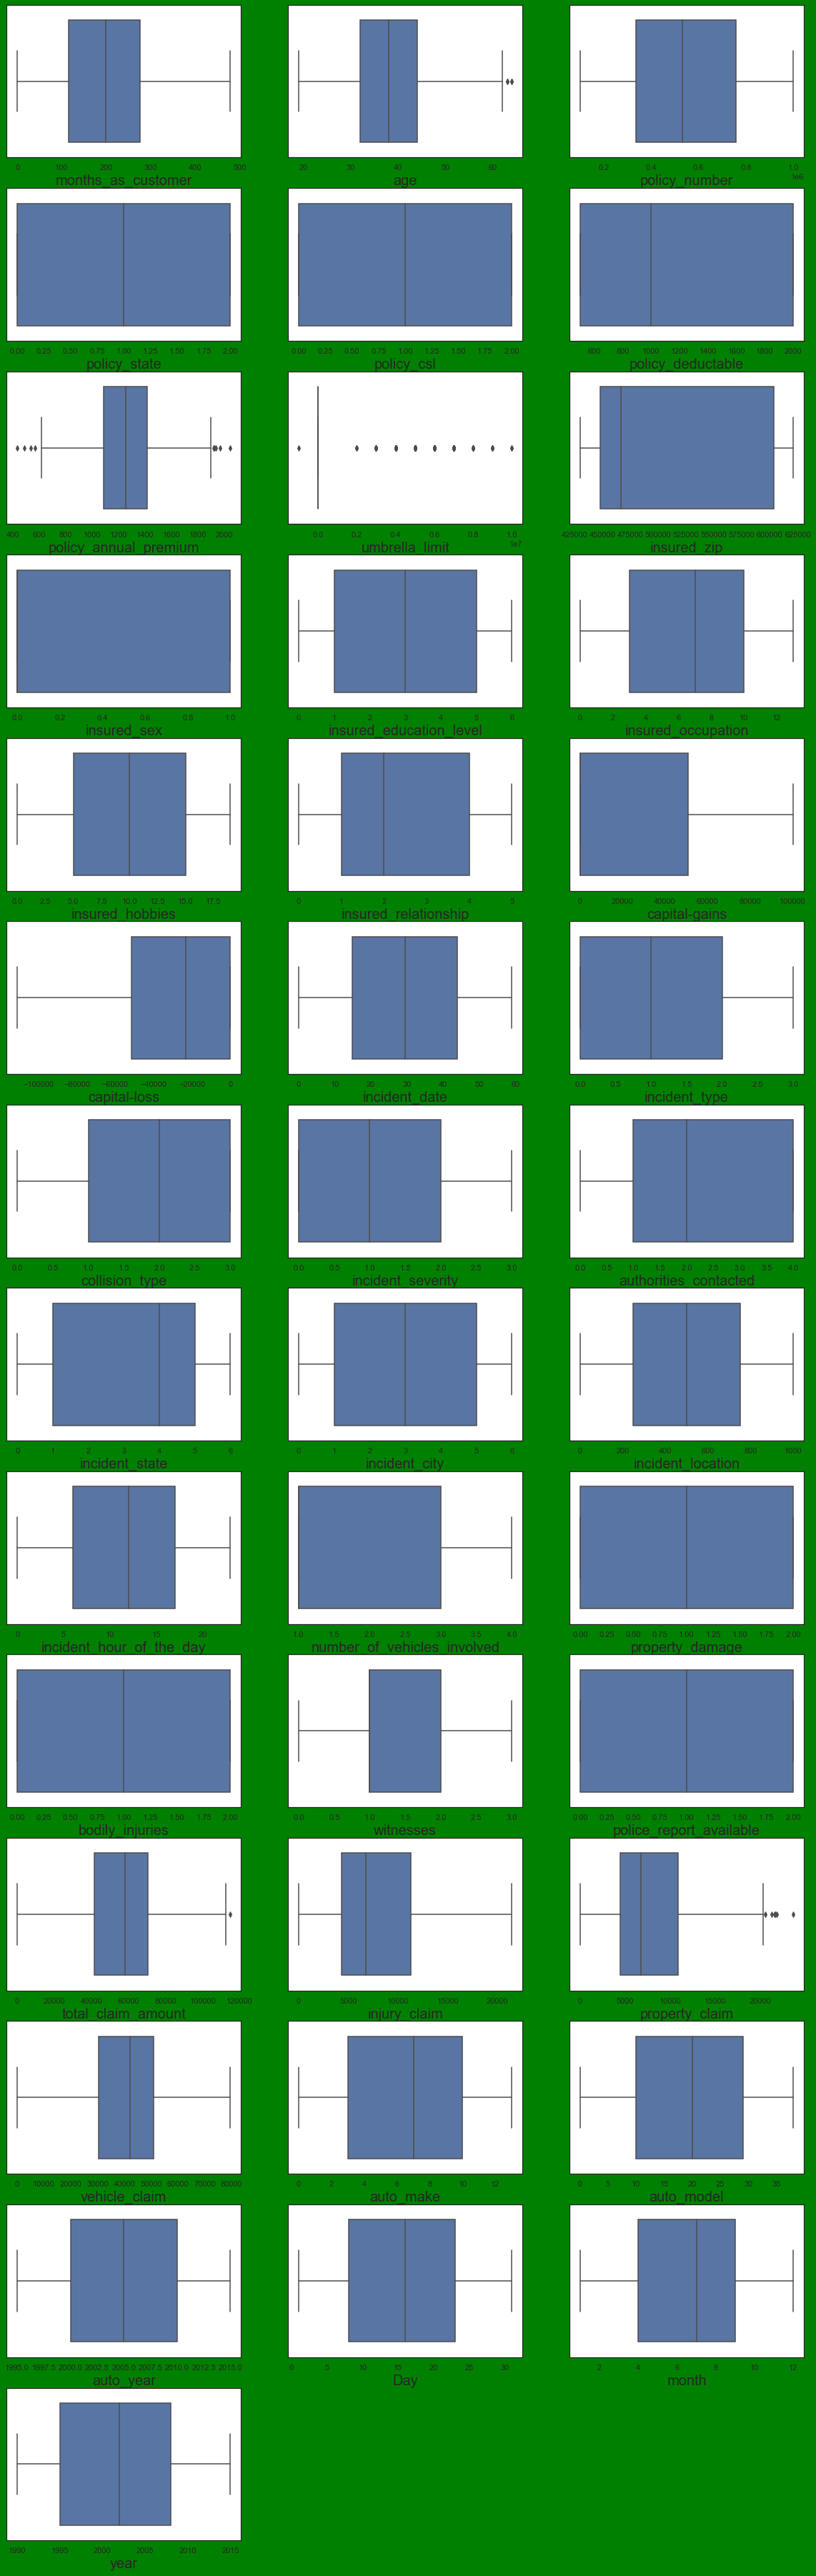

In [16]:

## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,70),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=45:
        ax=plt.subplot(15,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [17]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
         7,  7,  7], dtype=int64))

In [18]:
df= df[(z<3).all(axis=1)]
df.shape

(980, 39)

In [19]:
Data_loss=((1000-980)/1000)*100

Data_loss

2.0

In [20]:
df.reset_index()

,index,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,year
0,0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,2014
1,1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,2006
2,2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,2000
3,3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,1990
4,4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,...,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0,1991
976,996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,...,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0,2014
977,997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,...,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0,2003
978,998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,...,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0,2011


In [21]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,2.838258e+01,months_as_customer
1,1.316288e+02,age
2,5.698258e+00,policy_number
3,2.600386e+00,policy_state
4,2.474366e+00,policy_csl
5,4.640154e+00,policy_deductable
6,2.866850e+01,policy_annual_premium
7,1.271620e+00,umbrella_limit
8,5.153853e+01,insured_zip
9,1.913109e+00,insured_sex


In [23]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [26]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))


     Actual  Predicted
254     1.0        0.0
521     0.0        0.0
281     1.0        0.0
351     1.0        0.0
67      0.0        0.0


In [27]:

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))


Confussion matrix:
[[133  12]
 [ 44  11]]


In [28]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.72


In [29]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83       145
         1.0       0.48      0.20      0.28        55

    accuracy                           0.72       200
   macro avg       0.61      0.56      0.55       200
weighted avg       0.68      0.72      0.68       200



In [30]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())


     Actual  Predicted
521     0.0        0.0
737     0.0        0.0
740     0.0        0.0
660     0.0        0.0
411     0.0        0.0


In [31]:
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))


Confussion matrix:
[[133  12]
 [ 42  13]]


In [32]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.73


In [33]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())


     Actual  Predicted
521     0.0        0.0
737     0.0        0.0
740     0.0        0.0
660     0.0        0.0
411     0.0        0.0


In [34]:
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))


Confussion matrix:
[[139   6]
 [ 51   4]]


In [35]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.715


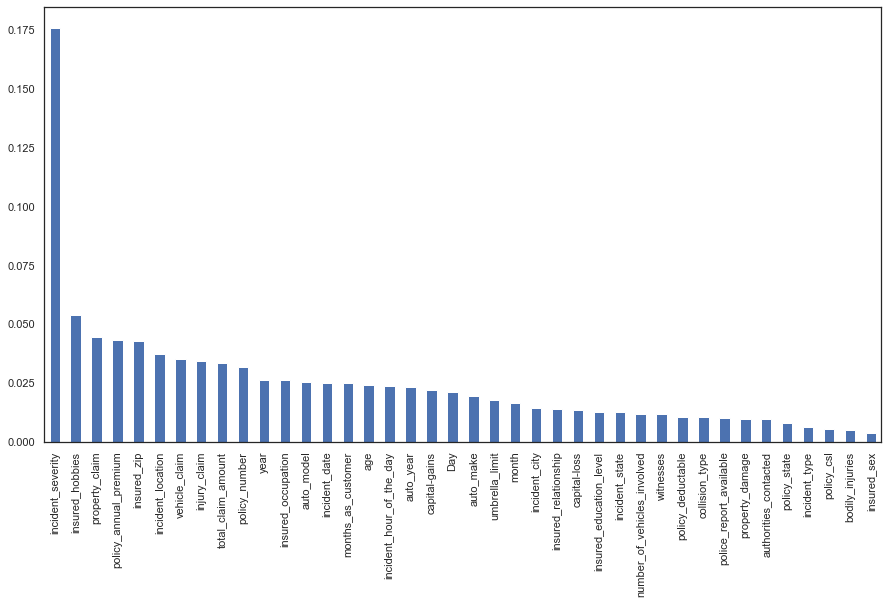

In [36]:
pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [37]:
## ## Conclusion:

## I have done EDA using Pandas and other plotting libraries.

## Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.

## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.

## I also learnt how to create new features which will in turn help us to better predict the survival.

## I get to know what are the features on which price is highly positively and negatively coorelated with.

## I came to know through analysis which model will be work with better accuracy.

## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 

## In this project I have worked to achieve model that predicts if an insurance claim is fraudulent or not. 

## We can see as per our requirement, Random forest is the most accurate model as per my analysis and assumption..

## I have worked to understand importace of feature in ascending order as per our model selected.

In [38]:
print('          ************************************ End of Project************************************              ')

          ************************************ End of Project************************************              
